In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("abalone_dataset.csv")

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
print(df.shape)

(4177, 9)


In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
df[df['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [8]:
means=pd.pivot_table(df,index=['Sex'],aggfunc={'Height':np.mean})
means

,Height
Sex,
F,0.158011
I,0.107996
M,0.151381


In [9]:
df['Height']=df['Height'].replace(to_replace=0,value=0.0107996)

In [10]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139522,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041810,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:
print("Value Count of Rings Column")
print(df.Rings.value_counts())

Value Count of Rings Column
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64


In [12]:
Age = []
for i in df["Rings"]:
    if i < 8:
        Age.append(1)
    elif i > 8 and i < 16 :
        Age.append(2)
    else:
        Age.append(3)
df["Age"] = Age
#df_1.drop("age" , axis =1,inplace=True)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


In [13]:
df=pd.get_dummies(df)

In [14]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,2,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1,0,1,0


In [15]:
df['Age'].value_counts()

2    2509
1     839
3     829
Name: Age, dtype: int64

In [16]:
X = df.drop(['Age','Rings'], axis = 1)
y = df['Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Use if you want to normalize data
#sc = StandardScaler()
#sc.fit(X_train)
#X_train_std = sc.transform(X_train)
#X_test_std = sc.transform(X_test)
#X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)
#X_test_std = pd.DataFrame(X_test_std, columns=X_train.columns)

#X_train = X_train_std.values
#X_test = X_test_std.values

X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values

In [17]:
classifiers = {
               "KNearest": KNeighborsClassifier(),
               "Support Vector Classifier": SVC(),
               "DecisionTreeClassifier": DecisionTreeClassifier(),
               "RandomForestClassifier" : RandomForestClassifier()}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  KNeighborsClassifier Has a training score of 72.0 % accuracy score
Classifiers:  SVC Has a training score of 73.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 65.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 73.0 % accuracy score


In [18]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.76      0.73      0.74       180
           2       0.77      0.90      0.83       503
           3       0.37      0.17      0.23       153

    accuracy                           0.73       836
   macro avg       0.63      0.60      0.60       836
weighted avg       0.69      0.73      0.70       836

[[131  32  17]
 [ 20 455  28]
 [ 21 106  26]]


In [21]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: C:\Users\Administrator\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [40]:
import pickle
pickle.dump(model, open('randomForestOrg.pkl', 'wb'))

In [52]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,2,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,2,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,2,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,1,0,1,0


In [26]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std = pd.DataFrame(X_train)
X_test_std = pd.DataFrame(X_test)
y_train_std = pd.DataFrame(y_train)
y_test_std = pd.DataFrame(y_test)

In [27]:
print(X_train_std)

          0      1      2       3       4       5      6    7    8    9
0     0.550  0.445  0.125  0.6720  0.2880  0.1365  0.210  0.0  1.0  0.0
1     0.475  0.355  0.100  0.5035  0.2535  0.0910  0.140  0.0  1.0  0.0
2     0.305  0.225  0.070  0.1485  0.0585  0.0335  0.045  1.0  0.0  0.0
3     0.275  0.200  0.065  0.1165  0.0565  0.0130  0.035  0.0  1.0  0.0
4     0.495  0.380  0.135  0.6295  0.2630  0.1425  0.215  0.0  0.0  1.0
...     ...    ...    ...     ...     ...     ...    ...  ...  ...  ...
3336  0.490  0.400  0.115  0.5690  0.2560  0.1325  0.145  1.0  0.0  0.0
3337  0.670  0.550  0.190  1.3905  0.5425  0.3035  0.400  1.0  0.0  0.0
3338  0.510  0.395  0.125  0.5805  0.2440  0.1335  0.188  0.0  0.0  1.0
3339  0.575  0.465  0.120  1.0535  0.5160  0.2185  0.235  0.0  0.0  1.0
3340  0.595  0.475  0.160  1.1405  0.5470  0.2310  0.271  1.0  0.0  0.0

[3341 rows x 10 columns]


In [28]:
print(X_test_std)

         0      1      2       3       4       5      6    7    8    9
0    0.605  0.455  0.160  1.1035  0.4210  0.3015  0.325  0.0  0.0  1.0
1    0.590  0.440  0.150  0.8725  0.3870  0.2150  0.245  0.0  0.0  1.0
2    0.560  0.445  0.195  0.9810  0.3050  0.2245  0.335  1.0  0.0  0.0
3    0.635  0.490  0.170  1.2615  0.5385  0.2665  0.380  1.0  0.0  0.0
4    0.475  0.385  0.145  0.6175  0.2350  0.1080  0.215  0.0  0.0  1.0
..     ...    ...    ...     ...     ...     ...    ...  ...  ...  ...
831  0.520  0.430  0.150  0.7280  0.3020  0.1575  0.235  1.0  0.0  0.0
832  0.595  0.435  0.150  0.9000  0.4175  0.1700  0.265  1.0  0.0  0.0
833  0.545  0.430  0.150  0.7420  0.3525  0.1580  0.208  0.0  1.0  0.0
834  0.465  0.355  0.120  0.5805  0.2550  0.0915  0.184  0.0  1.0  0.0
835  0.365  0.275  0.085  0.2230  0.0980  0.0375  0.075  0.0  1.0  0.0

[836 rows x 10 columns]


In [29]:
print(y_train_std)

      0
0     2
1     3
2     1
3     1
4     2
...  ..
3336  2
3337  2
3338  2
3339  2
3340  1

[3341 rows x 1 columns]


In [30]:
print(y_test_std)

     0
0    2
1    3
2    3
3    2
4    2
..  ..
831  2
832  3
833  2
834  3
835  1

[836 rows x 1 columns]


In [32]:
pd.DataFrame(X_train).to_csv('XTraining.csv',index=False)
pd.DataFrame(X_test).to_csv('XTesting.csv',index=False)

In [33]:
pd.DataFrame(y_train).to_csv('YTraining.csv',index=False)
pd.DataFrame(y_test).to_csv('YTesting.csv',index=False)

In [66]:
pd.DataFrame(df).to_csv('BeforeAccurancy1.csv',index=False)

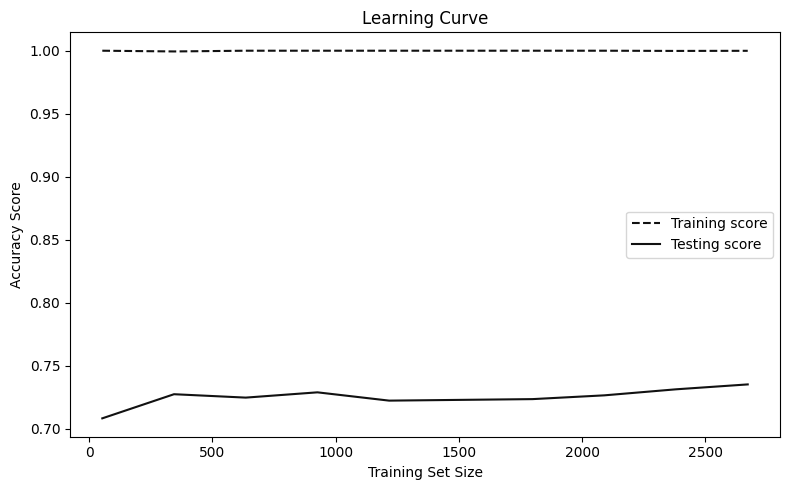

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
rf = make_pipeline(SimpleImputer(), StandardScaler(), RandomForestClassifier(random_state=42)) 
def plot_learning_curves(estimator, X, y, cv):

                    train_sizes, train_scores, test_scores = learning_curve(
                        estimator=estimator,
                        X=X_train,
                        y=y_train,
                        train_sizes=np.linspace(0.02, 1.0, 10),
                        cv=5,
                        scoring="accuracy",
                        random_state=42
                    )
                    train_mean = np.mean(train_scores, axis=1)
                    test_mean = np.mean(test_scores, axis=1)

                    plt.subplots(figsize=(8,5))
                    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
                    plt.plot(train_sizes, test_mean, color="#111111", label="Testing score")
                    plt.title("Learning Curve")
                    plt.xlabel("Training Set Size")
                    plt.ylabel("Accuracy Score")
                    plt.legend(loc="best")
                    plt.tight_layout()
                    plt.show()
plot_learning_curves(rf, X_train, y_train, cv=5)

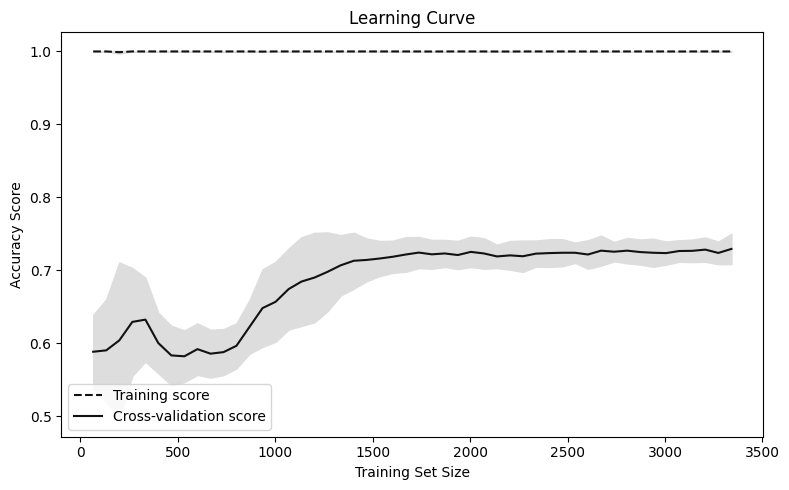

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X, y, cv=5, scoring='accuracy',random_state=42, n_jobs=-1, train_sizes=np.linspace(0.02, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(8,5))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()